In [3]:
import folium

map_kirov = folium.Map(location=[58.603, 49.667], zoom_start=13)

# Корпус №2
folium.Marker([58.604313, 49.665849], popup='<b>Корпус №2</b>', tooltip='Корпус №2').add_to(map_kirov)
# Корпус №3
folium.Marker([58.604294, 49.673736], popup='<b>Корпус №3</b>', tooltip='Корпус №3').add_to(map_kirov)
# Корпус №6
folium.Marker([58.605110, 49.618076], popup='<b>Корпус №6</b>', tooltip='Корпус №6').add_to(map_kirov)
# Корпус №9
folium.Marker([58.604435, 49.617331], popup='<b>Корпус №9</b>', tooltip='Корпус №9').add_to(map_kirov)
# Корпус №15
folium.Marker([58.567359, 49.686330], popup='<b>Корпус №15</b>', tooltip='Корпус №15', icon=folium.Icon(color='red')).add_to(map_kirov)
# Корпус №17
folium.Marker([55.834659, 37.548770], popup='<b>Корпус №17</b>', tooltip='Корпус №17').add_to(map_kirov)
map_kirov.save("vyatgu_map.html")


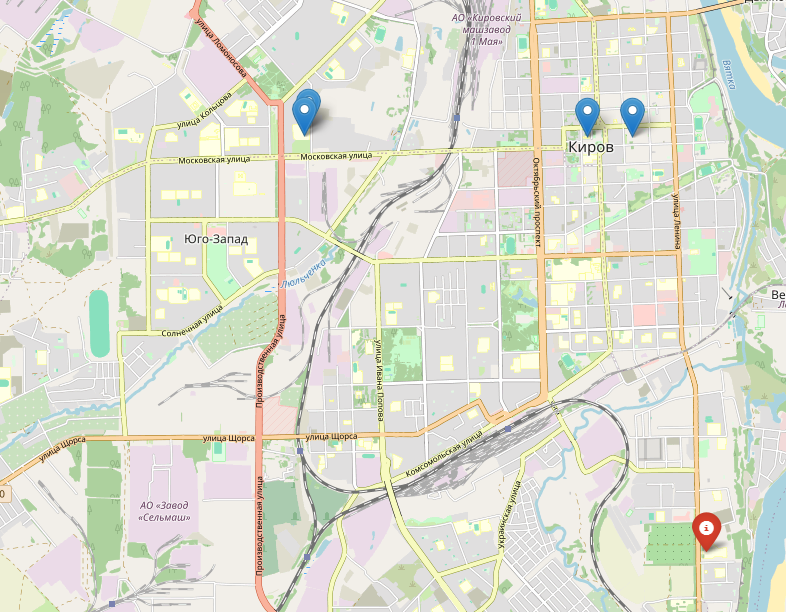

In [1]:
import folium
from math import radians, sin, cos, sqrt, atan2

# Функция для расчета great-circle расстояния между двумя точками
def calculate_distance(lat1, lon1, lat2, lon2):
    # Переводим координаты в радианы
    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)

    # Радиус Земли в километрах
    R = 6371.0

    # Разница между долготами и широтами
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad

    # Формула Хаверсина
    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Расстояние между точками
    distance = R * c
    return distance

# Координаты корпуса №1
corp_1_lat = 58.602658
corp_1_lon = 49.666612


map_kirov = folium.Map(location=[58.603, 49.667], zoom_start=13)

corps_coordinates = {
    "Корпус №2": (58.604313, 49.665849),
    "Корпус №3": (58.604294, 49.673736),
    "Корпус №6": (58.605110, 49.618076),
    "Корпус №9": (58.604435, 49.617331),
    "Корпус №15": (58.567359, 49.686330),
    "Корпус №17": (58.590902, 49.680078)
}

for corp, coords in corps_coordinates.items():
    corp_lat, corp_lon = coords

    # Расчет расстояния от текущего корпуса до корпуса №1
    distance_to_corp_1 = calculate_distance(corp_1_lat, corp_1_lon, corp_lat, corp_lon)

    # Добавление маркера для текущего корпуса
    folium.Marker(
        location=[corp_lat, corp_lon],
        popup=f'<b>{corp}</b>',
        tooltip=corp
    ).add_to(map_kirov)

    # Добавление круга с радиусом расстояния до корпуса №1
    folium.Circle(
        location=[corp_lat, corp_lon],
        radius=distance_to_corp_1 * 1000,  # Переводим расстояние из км в метры
        color='blue',
        fill=True,
        fill_opacity=0.2,
        tooltip=f'Расстояние до корпуса №1: {distance_to_corp_1:.2f} км'
    ).add_to(map_kirov)

map_kirov.save("kirov_map_with_circles.html")


In [1]:
import pandas as pd
import folium

# population_data = {
#      "Region": ["Адыгея", "Алтай", "Алтайский", "Амурская", "Архангельская", "Астраханская", "Башкортостан", "Белгородская", "Брянская", "Бурятия", "Владимирская", "Волгоградская", "Вологодская", "Воронежская", "Дагестан", "Еврейская", "Забайкальский", "Ивановская", "Ингушетия", "Иркутская", "Кабардино-Балкарская", "Калининградская", "Калмыкия", "Калужская", "Камчатский", "Карачаево-Черкесская", "Карелия", "Кемеровская", "Кировская", "Коми", "Костромская", "Краснодарский", "Красноярский", "Крым", "Курганская", "Курская", "Ленинградская", "Липецкая", "Магаданская", "Марий Эл", "Мордовия", "Москва", "Московская", "Мурманская", "Ненецкий", "Нижегородская", "Новгородская", "Новосибирская", "Омская", "Оренбургская", "Орловская", "Пензенская", "Пермский", "Приморский", "Псковская", "Ростовская", "Рязанская", "Самарская", "Санкт-Петербург", "Саратовская", "Саха", "Сахалинская", "Свердловская", "Севастополь", "Северная Осетия", "Смоленская", "Ставропольский", "Тамбовская", "Татарстан", "Тверская", "Томская", "Тульская", "Тыва", "Тюменская", "Удмуртская", "Ульяновская", "Хабаровский", "Хакасия", "Ханты-Мансийский", "Челябинская", "Чеченская", "Чувашская", "Чукотский", "Ямало-Ненецкий", "Ярославская"],
#     "Population": [792482, 1049708, 10116759, 4107408, 1534318, 1202932, 972183, 1361025, 3317996, 1172047, 2300538, 3138265, 180459, 1073311, 1027789, 406871, 505938, 2403295, 883429, 1087455, 276502, 996678, 315464, 451551, 674681, 2818957, 1262346, 919116, 610751, 2688757, 3856180, 2089038, 198317, 1269231, 769907, 538902, 125989, 781258, 1467629, 759083, 265208, 2337714, 732772, 514830, 262037, 179556, 271317, 161470, 2747852, 343533, 136135, 5118410, 688906, 156178, 1958477, 2505761, 1032290, 2324367, 5424575, 537133, 616573, 134294, 3152252, 3837533, 361437, 381258, 314996, 398062, 133280, 141437, 548539, 104312, 1344841, 107678, 1606625, 1559385, 383487, 161027, 361071, 1429762, 493819, 1022949, 1070785, 120900, 160077],
    
# }


state_data = pd.read_csv("./ruspop.csv")

russia_geojson = 'russia.geojson'

m = folium.Map(location=[55.7558, 37.6173], zoom_start=4)

folium.Choropleth(
    geo_data=russia_geojson,
    name='choropleth',
    data=state_data,
    columns=['region', 'population'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Population'
).add_to(m)

folium.LayerControl().add_to(m)

m.save('population_map.html')